<a href="https://colab.research.google.com/github/lucaspn017/qualitative_datas/blob/main/Projeto_de_An%C3%A1lise_de_Dados_Detec%C3%A7%C3%A3o_de_Spam_em_E_mails.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise de Emails de Phishing: Identificação de Padrões e Modelo Preditivo

1. Carregamento e Inspeção Inicial

In [10]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords

# Baixar as stopwords
nltk.download('stopwords')

df = pd.read_csv("CEAS_08.csv")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


2. Análise Exploratória (EDA)

Text(0.5, 1.0, 'Palavras mais comuns em Spam')

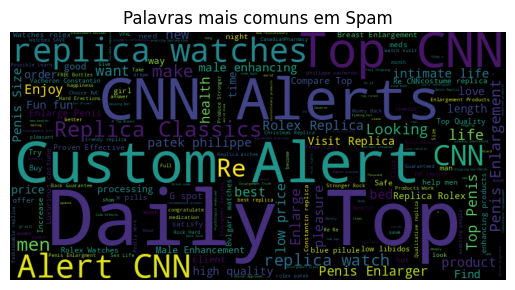

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

spam_subjects = " ".join(df[df["label"] == 1]["subject"].astype(str))
wordcloud = WordCloud(width=800, height=400).generate(spam_subjects)
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Palavras mais comuns em Spam")


3. Pré - processamento


In [13]:
import re
from nltk.corpus import stopwords

def clean_text(text):
    if not isinstance(text, str):
        text = str(text)  # Converte o valor para string se não for uma string
    text = re.sub(r"[^\w\s]", "", text.lower())
    words = text.split()
    words = [w for w in words if w not in stopwords.words("english")]
    return " ".join(words)

df["clean_subject"] = df["subject"].apply(clean_text)

4. Modelagem


In [14]:
from sklearn.model_selection import train_test_split
X = df["clean_subject"]  # Pode incluir outras features
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=500)
X_train_tfidf = tfidf.fit_transform(X_train)

In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

5. Avaliação

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = model.predict(tfidf.transform(X_test))
print("Acurácia:", accuracy_score(y_test, y_pred))

Acurácia: 0.9329587536713063


Text(50.722222222222214, 0.5, 'Real')

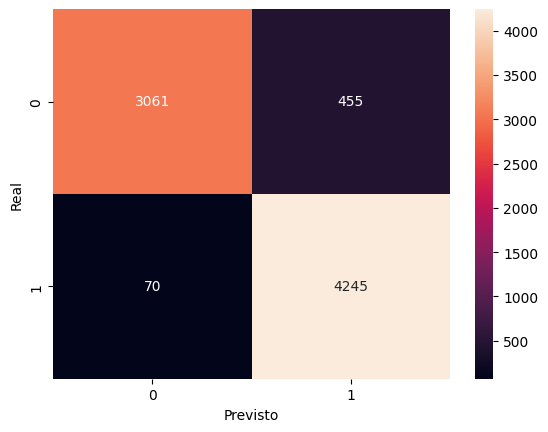

In [18]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.xlabel("Previsto")
plt.ylabel("Real")